# Main Library

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Preprocessing & LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Building Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# XGBoost
import xgboost as xgb

# Hyper parameter 
from sklearn.model_selection import GridSearchCV

In [2]:
# Reading Data 
data = pd.read_csv("D:\Courses language programming\Machine Learning\Folder Machine Learning\Loan_staute\Loan_staute.csv")
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
# information from Data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# Statistic information

data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Cleaning Data

In [5]:
data.drop(columns="Loan_ID", axis=1, inplace=True)

# Fill Missing Value By mean

In [6]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
## Fillna Data ==> mean
def fillna_data(data):
    data_not_object = data.select_dtypes(exclude=["object"])
    
    data_object = data.select_dtypes(include=["object"])
    
    for col in data_not_object:
        data[col].fillna(data[col].mean(), inplace=True)
        
    for col in data_object:
        data[col].fillna(data[col].value_counts().index[0], inplace=True)
        
        
    return data
data = fillna_data(data)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


# Label Encoder

In [9]:
data.replace({"Loan_Status":{"N":0, "Y":1}}, inplace=True)

In [10]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [11]:
data.replace(to_replace="3+", value=4, inplace=True)

In [12]:
data["Dependents"].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

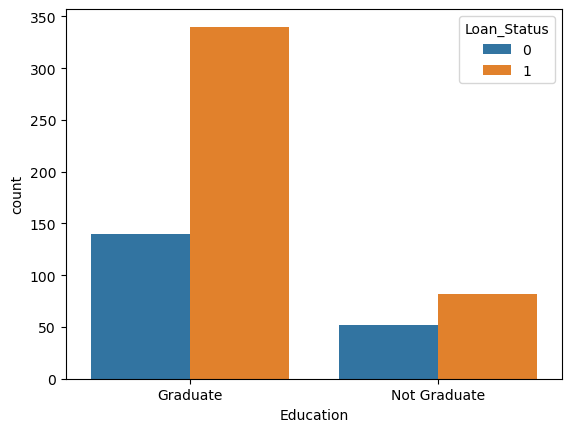

In [13]:
sns.countplot(x="Education", hue="Loan_Status", data=data)

<AxesSubplot:xlabel='Married', ylabel='count'>

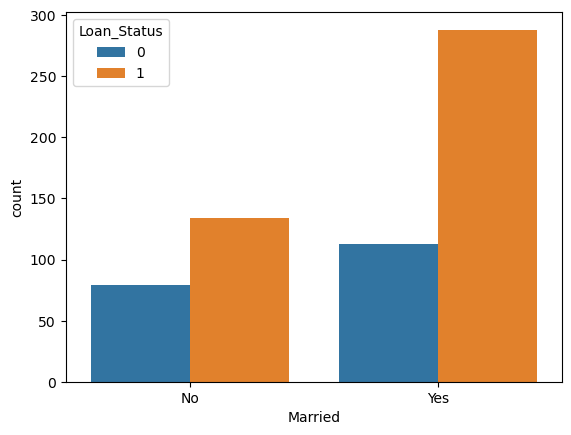

In [14]:
sns.countplot(x="Married", hue="Loan_Status", data=data)

In [15]:
data["Dependents"] = data["Dependents"].astype("int64")

In [18]:
data_object = data.select_dtypes(include=["object"])

la = LabelEncoder()

for col in data_object.columns:
    data[col] = la.fit_transform(data[col])
    
data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,1,1,4,0,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1,0


# Data Visuallization

<AxesSubplot:>

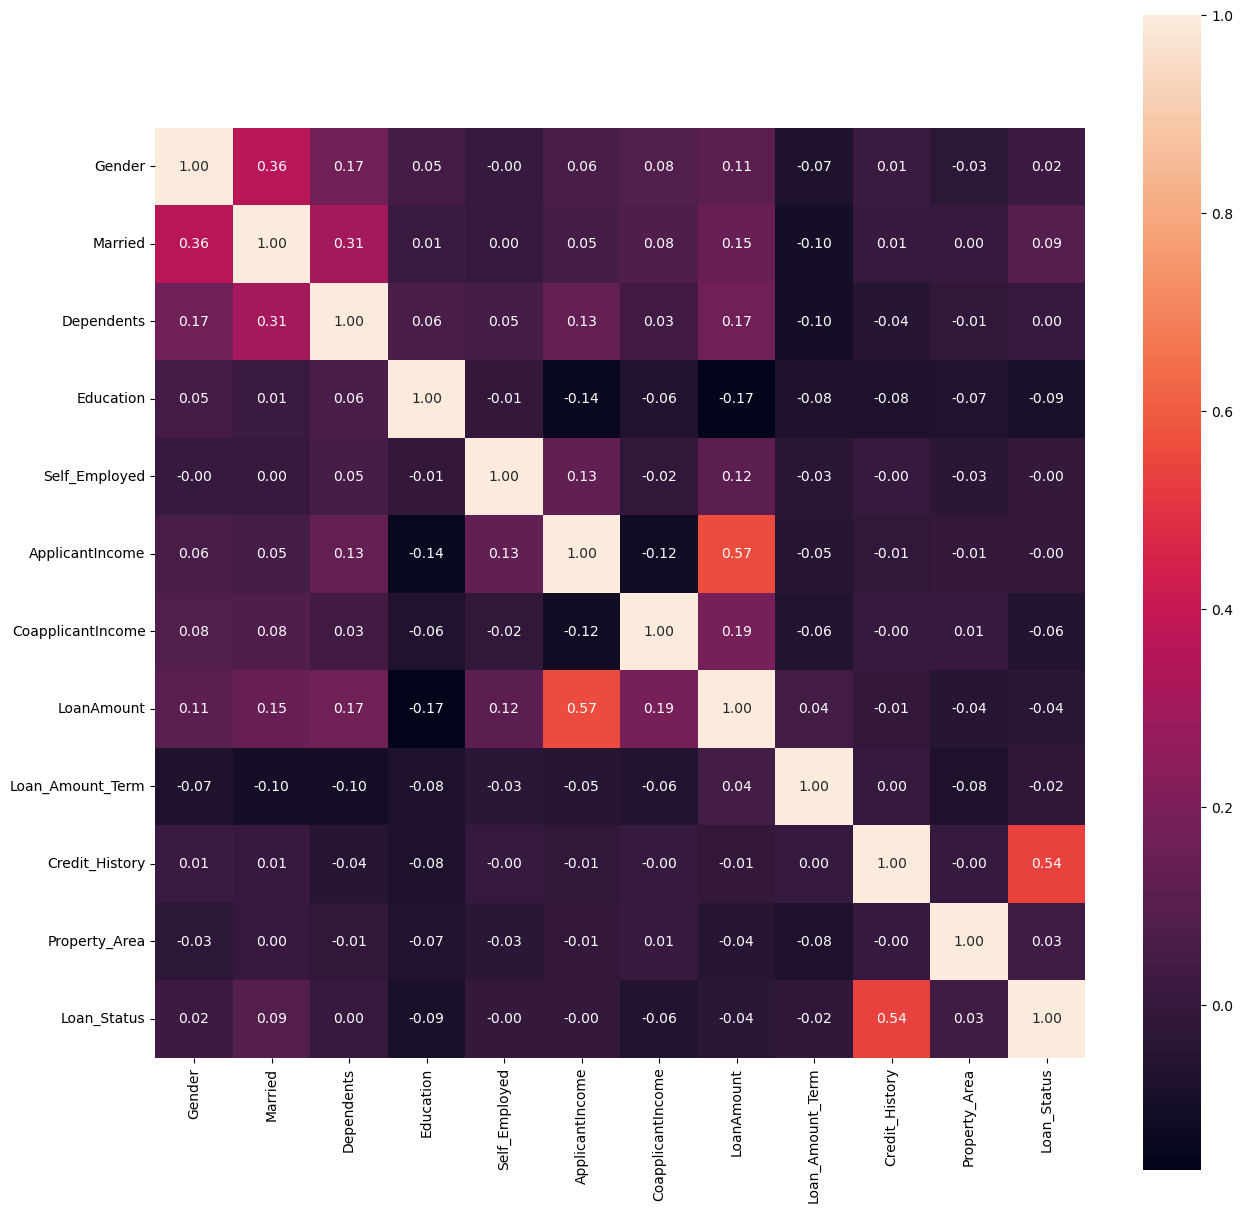

In [19]:
plt.figure(figsize=(15 ,15))
sns.heatmap(data.corr(), annot=True, square=True, fmt="0.2f")

#### Correlaction between ==> (LoanAmount, Education, CoapplicantIncome) 
not Good

# Splitting Data

In [20]:
X = data.drop(columns=["Loan_Status"], axis=1)
Y = data["Loan_Status"]

In [22]:
X.shape, Y.shape

((614, 11), (614,))

In [343]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42, shuffle=Y)

# Building Model

# Model 1 ==> LogisticRegression

In [346]:
model_log = LogisticRegression(max_iter=20000, C=10)
model_log.fit(x_train, y_train)

print(f"The Accuracy SCore Train is {model_log.score(x_train, y_train)}")
print(f"The Accuracy SCore Test is {model_log.score(x_test, y_test)}")

The Accuracy SCore Train is 0.814663951120163
The Accuracy SCore Test is 0.7886178861788617


# Model 2 ==> RandomForestClassifier

In [336]:
model_RF = RandomForestClassifier(max_depth=4, n_estimators=50, min_samples_leaf=4)
model_RF.fit(x_train, y_train)

print(f"The Accuracy SCore Train is {model_RF.score(x_train, y_train)}")
print(f"The Accuracy SCore Test is {model_RF.score(x_test, y_test)}")

The Accuracy SCore Train is 0.8167006109979633
The Accuracy SCore Test is 0.7886178861788617


In [278]:
param = {"n_estimators": np.arange(100, 200, 10),
         "max_depth": np.arange(15, 25, 1),
         "min_samples_split": np.arange(1,5)}

new_model_random = GridSearchCV(estimator=model_RF, 
                               param_grid=param,
                               verbose=6,
                               cv=5,
                               n_jobs=-1)
new_model_random.fit(x_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
500 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\osama\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\osama\anaconda3\lib\site-package

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=30, n_estimators=500),
             n_jobs=-1,
             param_grid={'max_depth': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24]),
                         'min_samples_split': array([1, 2, 3, 4]),
                         'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190])},
             verbose=6)

In [282]:
new_model_random.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_split=4, n_estimators=190)

# Model 3 ==> AdaBoostClassifier

In [279]:
model_AD = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20, 
                                                                    min_samples_split=5,
                                                                    min_samples_leaf=6, 
                                                                    random_state=8),
                              n_estimators=50,
                              learning_rate=0.2)


model_AD.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_AD.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_AD.score(x_test, y_test)}")

The predict Score Train is ==> 1.0
%----------------------------------------------------------%
The predict Score Test is ==> 0.7560975609756098


# Model 3  ==> XGboost

In [324]:
model_xgb = xgb.XGBClassifier(n_estimators=10, max_depth=5,
                              max_leaves=10,
                              learning_rate=0.2,
                              min_child_weight=15, 
                              max_bin=5)
model_xgb.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_xgb.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_xgb.score(x_test, y_test)}")

The predict Score Train is ==> 0.814663951120163
%----------------------------------------------------------%
The predict Score Test is ==> 0.7886178861788617
